In [1]:
from pythologist_test_images import TestImages
from pythologist import CellDataFrame
from pythologist_reader.formats.inform.sets import CellProjectInForm
import matplotlib.pyplot as plt

# Read an InForm into an h5 storage object

The images are saved in a project directory that is full of sample directories.  The sample directories can have multiple images.

## Basic InForm project read

microns_per_pixel 0.496
Reading sample /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3 for sample MEL3
Acquiring frame /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3/MEL3_1_cell_seg_data.txt
Reading image data.
Reading component images.
Finished reading component images.
Binary seg file present.
Making cell-map filled-in.
Finished cell-map.
Making edge-map.
Making dataframe of possible neighbors.
Testing for edge.
Finished edge-map.
Set interaction map if appropriateFinished reading seg file present.
Reading text data.
Finished assigning phenotype list.
Finished setting the cell list regions are set.
Finished setting the measurements.
Finished reading score.
Acquiring frame /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3/MEL3_2_cell_seg_data.txt
Reading image data.
Reading component images.
Finished reading component images.
Binary

MEL2_7


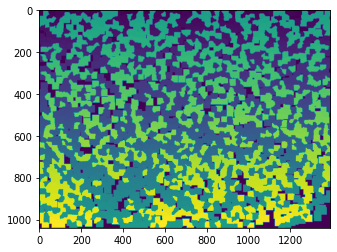

In [2]:
from pythologist_test_images import TestImages
from pythologist_reader.formats.inform.sets import CellProjectInForm
import matplotlib.pyplot as plt

# Get the path of the test dataset
path = TestImages().raw('IrisSpatialFeatures')
# Create the storage opbject where the project will be saved
cpi = CellProjectInForm('pythologist.h5',mode='w')
# Read the project data
cpi.read_path(path,require=False,verbose=True,microns_per_pixel=0.496,sample_name_index=-1)
# Display one of the cell map images
for f in cpi.frame_iter():
    break
print(f.frame_name)
plt.imshow(f.cell_map_image(),origin='upper')
plt.show()

## Read an inForm export that also includes a margin and tumor mask.

The Tumor mask is a layer that is not transparent where the tumor is.  Its present with every image as `*_Tumor.tif`.

The Invasive Margin mask is just a line of a fixed pixel width drawn long the margin.  It will be expaneded by the defined number of pixels.  It is present with every image as `*_Invasive_Margin.tif`.



microns_per_pixel 0.496
Reading sample /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3 for sample MEL3
Acquiring frame /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3/MEL3_1_cell_seg_data.txt
Reading image data.
Reading component images.
Finished reading component images.
Binary seg file present.
Making cell-map filled-in.
Finished cell-map.
Making edge-map.
Making dataframe of possible neighbors.
Testing for edge.
Finished edge-map.
Set interaction map if appropriateFinished reading seg file present.
Reading text data.
Finished assigning phenotype list.
Finished setting the cell list regions are set.
Finished setting the measurements.
Finished reading score.
setting tumor and stroma and margin
finished tumor and stroma and margin
Acquiring frame /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3/MEL3_2_cell_seg_data.txt
Reading image 

MEL2_7
hand drawn margin


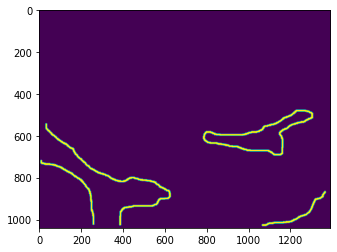

hand drawn tumor area


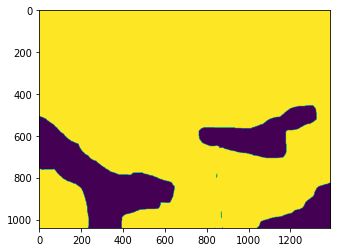

Mutually exclusive Margin, Tumor, and Stroma


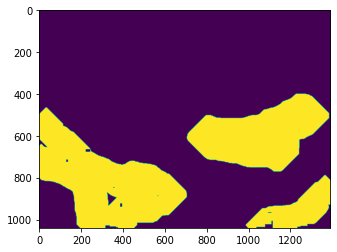

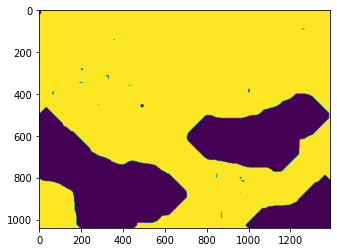

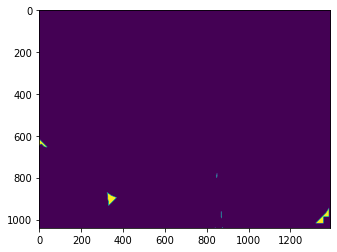

In [3]:
from pythologist_test_images import TestImages
from pythologist_reader.formats.inform.custom import CellProjectInFormLineArea

# Get the path of the test dataset
path = TestImages().raw('IrisSpatialFeatures')
# Specify where the data read-in will be stored as an h5 object
cpi = CellProjectInFormLineArea('test.h5',mode='w')
# Read in the data (gets stored on the fly into the h5 object)
cpi.read_path(path,
              sample_name_index=-1,
              verbose=True,
              steps=76,
              project_name='IrisSpatialFeatures',
              microns_per_pixel=0.496)
for f in cpi.frame_iter():
    break
print(f.frame_name)
print('hand drawn margin')
plt.imshow(f.get_image(f.get_data('custom_images').\
    set_index('custom_label').loc['Drawn','image_id']),origin='upper')
plt.show()
print('hand drawn tumor area')
plt.imshow(f.get_image(f.get_data('custom_images').\
    set_index('custom_label').loc['Area','image_id']),origin='upper')
plt.show()
print('Mutually exclusive Margin, Tumor, and Stroma')
plt.imshow(f.get_image(f.get_data('regions').\
    set_index('region_label').loc['Margin','image_id']),origin='upper')
plt.show()
plt.imshow(f.get_image(f.get_data('regions').\
    set_index('region_label').loc['Tumor','image_id']),origin='upper')
plt.show()
plt.imshow(f.get_image(f.get_data('regions').\
    set_index('region_label').loc['Stroma','image_id']),origin='upper')
plt.show()

## Read a project with a custom tumor mask (but no margin line)

microns_per_pixel 0.496
Reading sample /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3 for sample MEL3
Acquiring frame /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3/MEL3_1_cell_seg_data.txt
Reading image data.
Reading component images.
Finished reading component images.
Binary seg file present.
Making cell-map filled-in.
Finished cell-map.
Making edge-map.
Making dataframe of possible neighbors.
Testing for edge.
Finished edge-map.
Set interaction map if appropriateFinished reading seg file present.
Reading text data.
Finished assigning phenotype list.
Finished setting the cell list regions are set.
Finished setting the measurements.
Finished reading score.
setting mask and not mask
finished mask and not mask
Acquiring frame /Users/jasonw/Source/pythologist/libs/pythologist-test-images/data/IrisSpatialFeatures/Example/MEL3/MEL3_2_cell_seg_data.txt
Reading image data.
Reading compon

Tumor


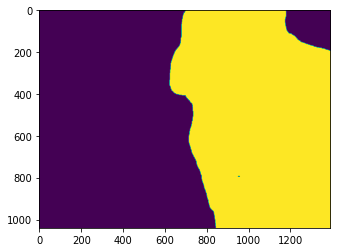

Not-Tumor


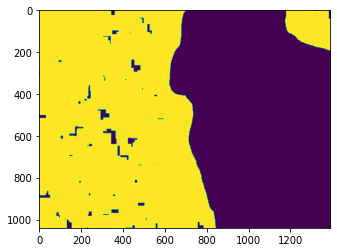

In [4]:
from pythologist_test_images import TestImages
from pythologist_reader.formats.inform.custom import CellProjectInFormCustomMask
import matplotlib.pyplot as plt
path = TestImages().raw('IrisSpatialFeatures')
cpi = CellProjectInFormCustomMask('test.h5',mode='w')
cpi.read_path(path,
              microns_per_pixel=0.496,
              sample_name_index=-1,
              verbose=True,
              custom_mask_name='Tumor',
              other_mask_name='Not-Tumor')
for f in cpi.frame_iter():
    rs = f.get_data('regions').set_index('region_label')
    for r in rs.index:
        print(r)
        plt.imshow(f.get_image(rs.loc[r]['image_id']),origin='upper')
        plt.show()
    break

# QC - Quality Check of projects

Check the general status of the CellDataFrame contents

In [5]:
from pythologist_test_images import TestImages
cpi = TestImages().project('IrisSpatialFeatures')
cdf = TestImages().celldataframe('IrisSpatialFeatures')
cdf = cpi.cdf
cdf.db = cpi
cdf.qc(verbose=True).print_results()

tests is None so running tests


Check microns per pixel attribute
PASS
Microns per pixel is 0.496
Check storage object is set
PASS
h5 object is set
Is there a 1:1 correspondence between sample_name and sample_id?
PASS
Good concordance.
Issue count: 0/2
Is there a 1:1 correspondence between frame_name and frame_id?
PASS
Good concordance.
Issue count: 0/4
Is there a 1:1 correspondence between project_name and project_id?
PASS
Good concordance.
Issue count: 0/1
Is the same frame name present in multiple samples?
PASS
frame_name's are all in their own samples
Issue count: 0/4
Are the same phenotypes listed and following rules for mutual exclusion?
PASS
phenotype_calls and phenotype_label follows expected rules
Are the same phenotypes included on all images?
PASS
Consistent phenotypes
Issue count: 0/4
Are the same scored names included on all images?
PASS
Consistent scored_names
Issue count: 0/4
Are the same regions represented the same with an image and across images?
PASS
Consistent regions
Issue count: 0/5
Are the same

# View density plots based on cell phenotype frequencies.

The cell phenotypes set prior to calling `cartesian` are the phenotypes available to plot.

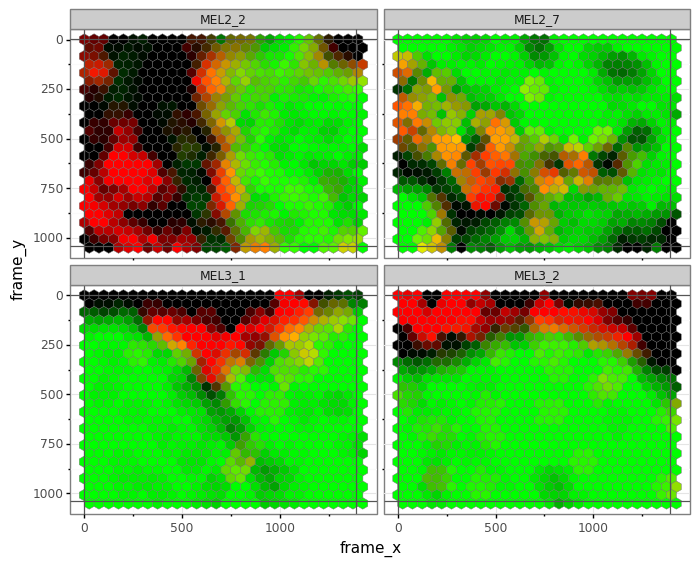

<ggplot: (8770517327003)>

In [6]:
from pythologist_test_images import TestImages
from plotnine import *
proj = TestImages().project('IrisSpatialFeatures')
cdf = TestImages().celldataframe('IrisSpatialFeatures')
cdf.db = proj
cart = cdf.cartesian(verbose=True,step_pixels=50,max_distance_pixels=75)
df,cols,rngtop = cart.rgb_dataframe(red='CD8+',green='SOX10+')
shape = cdf.iloc[0]['frame_shape']
(ggplot(df,aes(x='frame_x',y='frame_y',fill='color_str'))
 + geom_point(shape='h',size=4.5,color='#777777',stroke=0.2)
 + geom_vline(xintercept=-1,color="#555555")
 + geom_vline(xintercept=shape[1],color="#555555")
 + geom_hline(yintercept=-1,color="#555555")
 + geom_hline(yintercept=shape[0],color="#555555")
 + facet_wrap('frame_name')
 + scale_fill_manual(cols,guide=False)
 + theme_bw()
 + theme(figure_size=(8,8))
 + theme(aspect_ratio=shape[0]/shape[1])
 + scale_y_reverse()
)

## View histograms of pixel intensity and the scoring of binary markers on each image

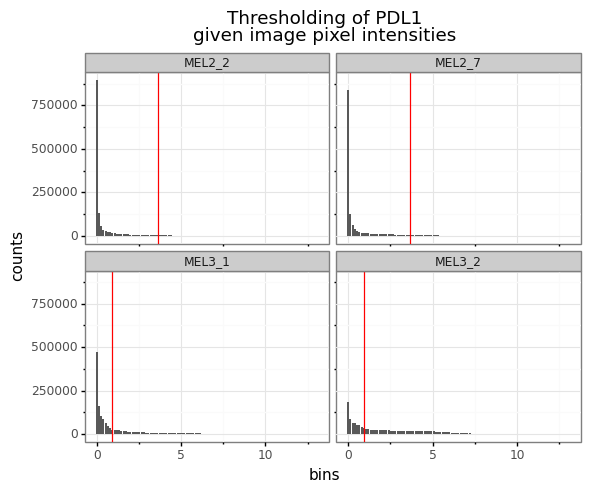

<ggplot: (8770672815536)>

In [7]:
from pythologist_test_images import TestImages
from plotnine import *
proj = TestImages().project('IrisSpatialFeatures')
cdf = TestImages().celldataframe('IrisSpatialFeatures')
cdf.db = proj
ch = cdf.db.qc().channel_histograms()
sub = ch.loc[(~ch['threshold_value'].isna())&(ch['channel_label']=='PDL1')]
(ggplot(sub,aes(x='bins',y='counts'))
 + geom_bar(stat='identity')
 + facet_wrap('frame_name')
 + geom_vline(aes(xintercept='threshold_value'),color='red')
 + theme_bw()
 + ggtitle('Thresholding of PDL1\ngiven image pixel intensities')
)

# View cell-cell contacts

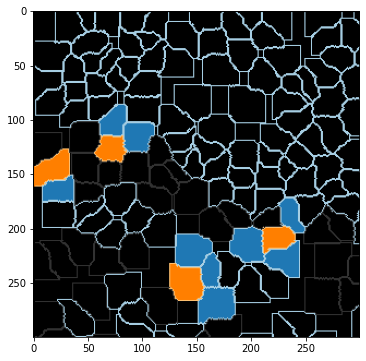

In [8]:
from pythologist_test_images import TestImages
from pythologist_reader.formats.inform.custom import CellProjectInFormCustomMask
from pythologist import SubsetLogic as SL
import matplotlib.pyplot as plt
from imageio import imread

cpi = TestImages().project('IrisSpatialFeatures')
cdf = cpi.cdf
cdf.db = cpi
sub = cdf.loc[cdf['frame_name']=='MEL2_7'].dropna()
cont = sub.contacts().threshold('CD8+','CD8+/contact').contacts().threshold('SOX10+','SOX10+/contact')
cont = cont.threshold('CD8+','SOX10+/contact',
                      positive_label='CD8+ contact',
                      negative_label='CD8+').\
    threshold('SOX10+','CD8+/contact',
              positive_label='SOX10+ contact',
              negative_label='SOX10+')
schema = [
    {'subset_logic':SL(phenotypes=['OTHER']),
     'edge_color':(50,50,50,255),
     'watershed_steps':0,
     'fill_color':(0,0,0,255)
    },
    {'subset_logic':SL(phenotypes=['SOX10+']),
     'edge_color':(166,206,227,255),
     'watershed_steps':0,
     'fill_color':(0,0,0,0)
    },
    {'subset_logic':SL(phenotypes=['CD8+']),
     'edge_color':(253,191,111,255),
     'watershed_steps':0,
     'fill_color':(0,0,0,0)
    },
    {'subset_logic':SL(phenotypes=['CD8+ contact']),
     'edge_color':(253,191,111,255),
     'watershed_steps':0,
     'fill_color':(255,127,0,255)
    },
    {'subset_logic':SL(phenotypes=['SOX10+ contact']),
     'edge_color':(166,206,227,255),
     'watershed_steps':0,
     'fill_color':(31,120,180,255)
    }
]
sio = cont.segmentation_images().build_segmentation_image(schema,background=(0,0,0,255))
sio.write_to_path('test_edges',overwrite=True)
fname = 'test_edges/IrisSpatialFeatures/MEL2/MEL2_7.png'
v = imread(fname)
plt.figure(figsize=(6,6))
plt.imshow(v[0:300,0:300])
plt.show()